In [7]:
from gammabayes.utils import irfs
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

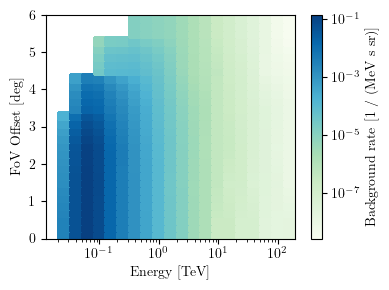

In [8]:
irfbkg = irfs['bkg']
plt.figure(figsize=(4,3))
irfbkg.to_2d().plot(add_cbar=True)
plt.tight_layout()

plt.savefig('Figures/irfbkg.pdf')
plt.show()

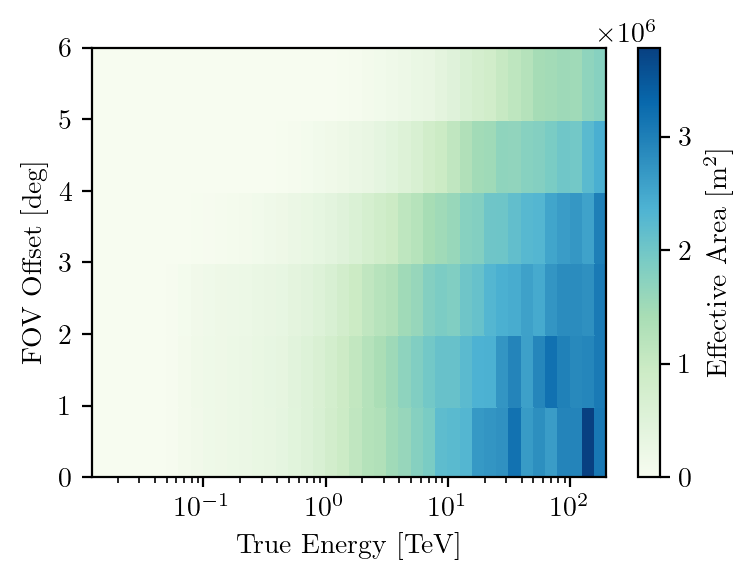

In [9]:
import numpy as np
from astropy import units as u

aeff = irfs['aeff']
edispfull = irfs['edisp']

offsetaxis = aeff.axes['offset'].center.value
energyaxis = aeff.axes['energy_true'].center.value

energymesh, offsetmesh = np.meshgrid(energyaxis, offsetaxis, indexing='ij')


plt.figure(figsize=(4,3), dpi=200)
pcol = plt.pcolormesh(energyaxis, 
               offsetaxis, 
               aeff.evaluate(energy_true=energymesh.flatten()*u.TeV, offset=offsetmesh.flatten()*u.deg).reshape(energymesh.shape).T,
               cmap='GnBu')
pcol.set_edgecolor('face')

plt.grid(False)
plt.xlabel('True Energy [TeV]')
plt.ylabel('FOV Offset [deg]')
plt.colorbar(label=r'Effective Area [m$^2$]')
plt.xscale('log')

plt.tight_layout()
plt.savefig('Figures/aeff.pdf')

plt.show()



In [10]:
aeff.axes['energy_true'].center.value

array([1.41253760e-02, 1.77827946e-02, 2.23872117e-02, 2.81838290e-02,
       3.54813380e-02, 4.46683586e-02, 5.62341314e-02, 7.07945776e-02,
       8.91250941e-02, 1.12201843e-01, 1.41253750e-01, 1.77827941e-01,
       2.23872113e-01, 2.81838288e-01, 3.54813388e-01, 4.46683580e-01,
       5.62341318e-01, 7.07945786e-01, 8.91250926e-01, 1.12201847e+00,
       1.41253757e+00, 1.77827941e+00, 2.23872108e+00, 2.81838291e+00,
       3.54813392e+00, 4.46683590e+00, 5.62341332e+00, 7.07945786e+00,
       8.91250926e+00, 1.12201847e+01, 1.41253757e+01, 1.77827944e+01,
       2.23872114e+01, 2.81838289e+01, 3.54813393e+01, 4.46683607e+01,
       5.62341330e+01, 7.07945779e+01, 8.91250936e+01, 1.12201845e+02,
       1.41253754e+02, 1.77827940e+02])

In [11]:
dir(col)

NameError: name 'col' is not defined

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_axes', '_data', '_fov_alignment', '_interpolate', '_interpolators', '_is_pointlike', '_mask_out_bounds', '_unit', 'axes', 'containment', 'containment_radius', 'cumsum', 'data', 'default_interp_kwargs', 'evaluate', 'evaluate_containment', 'evaluate_direct', 'evaluate_parameters', 'fov_alignment', 'from_hdulist', 'from_table', 'has_offset_axis', 'info', 'integral', 'integrate_log_log', 'interp_kwargs', 'interp_missing_data', 'is_allclose', 'is_pointlike', 'meta', 'normalize', 'pad', 'peek', 'plot_containment_radius', 'plot_containment_radius_vs_energy', 'plot_psf_vs_rad', 'quantity', 'read', 'required_axes', 're

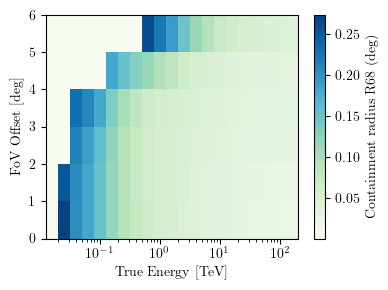

In [12]:
psf = irfs['psf']
print(dir(psf))
plt.figure(figsize=(4,3))
psf.plot_containment_radius(add_cbar=True)
plt.tight_layout()
plt.savefig('Figures/psf.pdf')
plt.show()

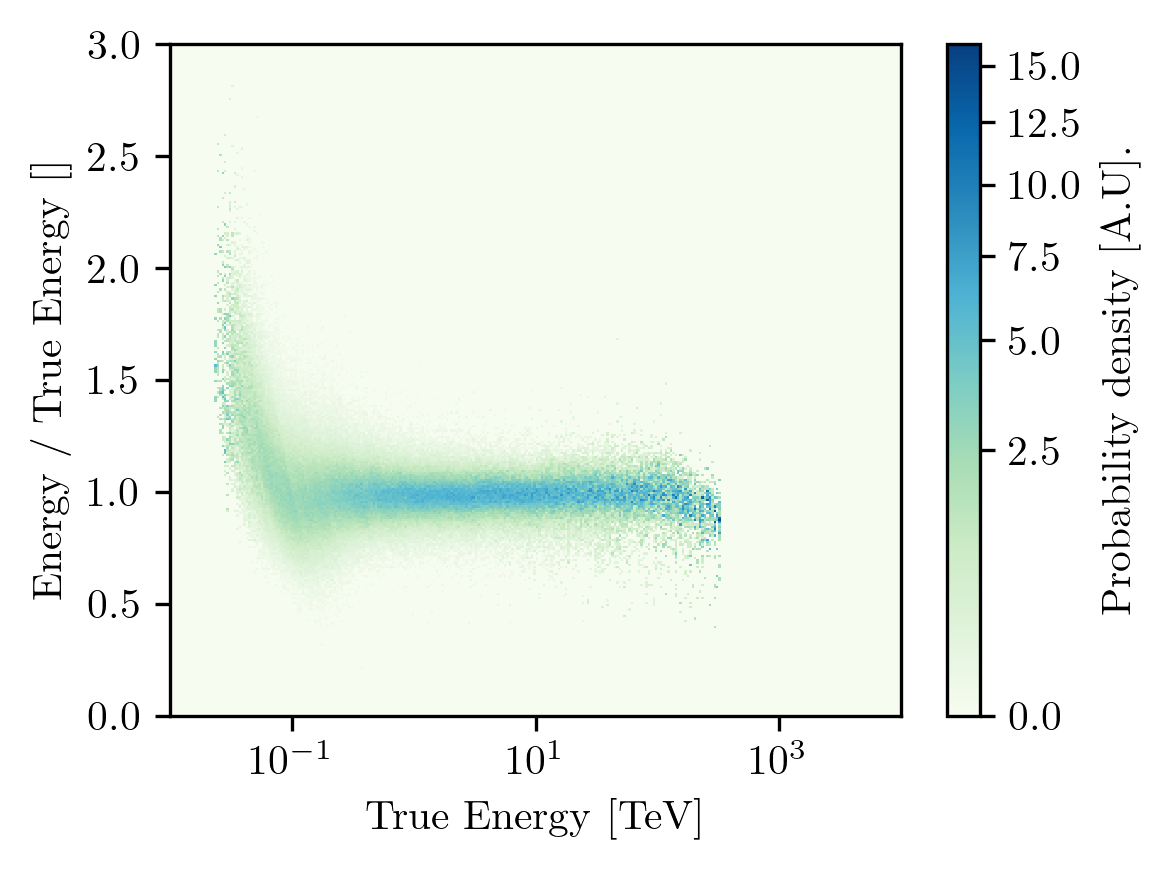

In [13]:
edisp = irfs['edisp']

plt.figure(figsize=(4,3), dpi=300)



edisp.plot_bias(add_cbar=True)

plt.tight_layout()
plt.savefig('Figures/edisp.png', dpi=400)

plt.show()

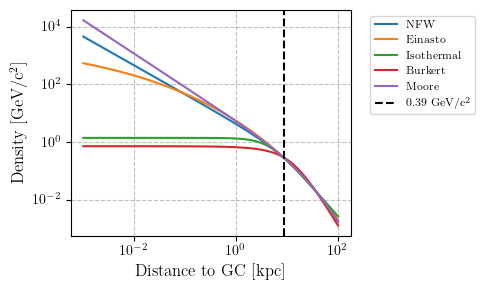

LOCAL_DENSITY: 0.3 GeV / cm3
DISTANCE_GC: 8.33 kpc


In [14]:
import numpy as np
import astropy.units as u

# %matplotlib inline
import matplotlib.pyplot as plt
from gammapy.astro.darkmatter import (
    profiles,
)


profiles.DMProfile.__subclasses__()



plt.figure(figsize=(5,3))
for profile in profiles.DMProfile.__subclasses__():
    p = profile()
    p.scale_to_local_density()
    radii = np.logspace(-3, 2, 100) * u.kpc
    plt.plot(radii, p(radii), label=p.__class__.__name__[:-7])

plt.loglog()
plt.axvline(8.5, linestyle="dashed", color="black", label=r"0.39 GeV/c$^2$")
plt.xlabel("Distance to GC [kpc]", size=12)
plt.ylabel(r"Density [GeV/c$^2$]", size=12)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=8)
plt.grid(ls='--', c='grey', alpha=0.5)
plt.tight_layout()
plt.savefig('Figures/DM_Densities.pdf')
plt.show()

print("LOCAL_DENSITY:", profiles.DMProfile.LOCAL_DENSITY)
print("DISTANCE_GC:", profiles.DMProfile.DISTANCE_GC)

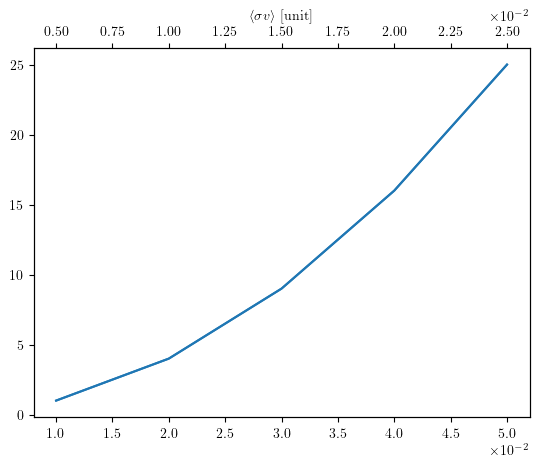

In [15]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker


import numpy as np
mpl.rcParams['axes.formatter.limits'] =  -2, 2


# Create a custom formatter to use scientific notation
class MySciFormatter(ticker.ScalarFormatter):
    def __init__(self, useOffset=True, useMathText=True):
        super().__init__(useOffset=useOffset, useMathText=useMathText)
        
    def _formatSciNotation(self, s, fmt, d):
        return "$10^{" + s + "}$"
        
        
        

ticker.ScalarFormatter = MySciFormatter

fig, ax = plt.subplots(1,1)

plt.plot([0.01,0.02,0.03,0.04,0.05], [1,4,9,16,25])
# ax.ticklabel_format(style='sci', axis='both', scilimits=(0,0), useMathText=True)

from matplotlib.ticker import FormatStrFormatter

ax_2 = ax.twiny()
ax_2.plot(0.5*np.array([0.01,0.02,0.03,0.04,0.05]), [1,4,9,16,25])
ax_2.set_xlabel(r'$\langle \sigma v \rangle$ [unit]')

plt.show()


In [16]:
mpl.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-2, 2],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'b

In [19]:
from gammabayes.utils import psf, longitudeaxistrue, longitudeaxis
log10eaxistrue_mesh , longitudeaxistrue_mesh , latitudeaxistrue_mesh , longitudeaxis_mesh , latitudeaxis_mesh  = np.meshgrid(0.0 , 0.0 , 0.0 , longitudeaxis , 0.0, indexing='ij')

recon_spatial_coord = np.array([longitudeaxis_mesh.flatten() , latitudeaxis_mesh.flatten()])
true_spatial_coord = np.array([longitudeaxistrue_mesh.flatten() , latitudeaxistrue_mesh.flatten()])


psfvalues = np.squeeze(psf(recon_spatial_coord, log10eaxistrue_mesh.flatten(), true_spatial_coord).reshape(log10eaxistrue_mesh.shape))

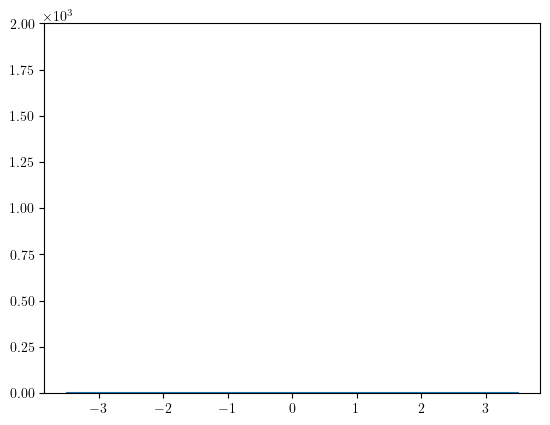

In [20]:
skips = 1

plt.figure()
plt.plot(longitudeaxis[::skips], np.exp(psfvalues.T)[::skips])
# plt.yscale('log')
plt.ylim([1e-10,2e3])
plt.show()